In [42]:
import pandas as pd
import glob

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters

from nltk.corpus import stopwords

%matplotlib inline

In [43]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [3]:
files_path = 'data/satirical_real_news_tweets/'
all_files = glob.glob(files_path + "/*.csv")
print("Numero de archivos:", len(all_files))
original_news_df = pd.DataFrame()
files_list = []
for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0, sep='\t')
    files_list.append(df)
original_news_df = pd.concat(files_list, ignore_index=True)
original_news_df = original_news_df.drop(columns=['Unnamed: 0'])
print(original_news_df.describe())
print(original_news_df.head())

Numero de archivos: 16
                                                     text target
count                                               10000  10000
unique                                               9992      2
top     José Manuel Soria compromete a Rajoy al oculta...   real
freq                                                    2   5000
                                                text target
0  Las lágrimas de un niño con autismo en un conc...   real
1  Vender carne de mono por ternera https://t.co/...   real
2  #Psicología Si buscas olvido en internet, verá...   real
3  El cantante congoleño Papa Wemba fallece en pl...   real
4  #Lomásvisto Vender carne de mono por ternera h...   real


In [4]:
total_data_content = original_news_df.text
total_data_target = original_news_df.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=70)

In [7]:
print("Reales entrenamiento:", len(y_train[y_train == 'real']))
print("Fakes entrenamiento:", len(y_train[y_train == 'fake']))
print("Reales pruebas:", len(y_test[y_test == 'real']))
print("Fakes pruebas:", len(y_test[y_test == 'fake']))

Reales entrenamiento: 3525
Fakes entrenamiento: 3475
Reales pruebas: 1475
Fakes pruebas: 1525


# Experimentos con el clasificador SVM radial y el metodo de ponderacion TF-IDF (Term Frequency Inverse Document Frecuency)
Los siguientes son los experimentos realizados para el clasificador SVM con kernel radial y con el metodo de ponderación para el modelo de espacio vectorial usando TF-IDF (Term Frequency Inverse Document Frecuency)

# Linea base

In [8]:
tf_idf_vect_baseline = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

In [9]:
parameters_svm_rbf = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}

### TF-IDF BaseLine

In [10]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_idf_vect_baseline, parameters_svm_rbf, SVC())

random state:  10
train time: 62.854s
random state:  20
train time: 79.392s
random state:  30
train time: 78.134s
random state:  40
train time: 80.768s
random state:  50
train time: 80.746s
random state:  60
train time: 83.262s
random state:  70
train time: 64.189s
random state:  80
train time: 66.865s
random state:  90
train time: 60.508s
random state:  100
train time: 44.927s
CPU times: user 2min 19s, sys: 14.8 s, total: 2min 34s
Wall time: 12min 17s


In [11]:
tf_idf_baseline_results = tf_baseline_results

Numero de caracteristicas:  (7000, 23353)

Best score selected:  0.8867142857142857
Best Accuracy:  0.88
Best Best F1-score:  0.8797455415659536
Best random state:  20
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8867142857142857
C: 1000
gamma: 0.001
kernel: 'rbf'


Exactitud: 0.88
F1_score: 0.8797455415659536
Precision: 0.8830124004435931
Recall: 0.8799115196460785

             precision    recall  f1-score   support

       fake     0.9165    0.8357    0.8742      1497
       real     0.8495    0.9242    0.8853      1503

avg / total     0.8829    0.8800    0.8798      3000

[[1251  246]
 [ 114 1389]]

Confusion matrix, without normalization
[[1251  246]
 [ 114 1389]]


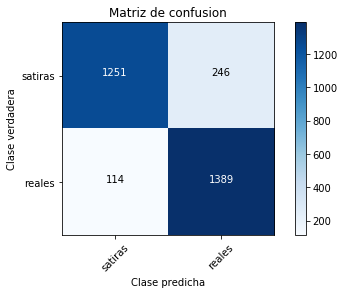

In [14]:
print_baseline_results(tf_idf_baseline_results, parameters_svm_rbf)

In [46]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

Numero de caracteristicas:  (7000, 23353)

train time: 22.660s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8867142857142857
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.88
F1_score: 0.8797455415659536
Precision: 0.8830124004435931
Recall: 0.8799115196460785

             precision    recall  f1-score   support

       fake     0.9165    0.8357    0.8742      1497
       real     0.8495    0.9242    0.8853      1503

avg / total     0.8829    0.8800    0.8798      3000

[[1251  246]
 [ 114 1389]]

Confusion matrix, without normalization
[[1251  246]
 [ 114 1389]]
CPU times: user 12.2 s, sys: 1.73 s, total: 13.9 s
Wall time: 26.9 s


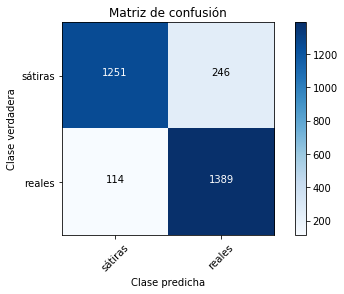

In [47]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_baseline, optimal_parameters, SVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_baseline)

## Experimento 1: Remocion de stop words

In [48]:
spanish_stopwords = stopwords.words('spanish')

In [49]:
tf_idf_vect_stopwords = TfidfVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True)

Numero de caracteristicas:  (7000, 23161)

train time: 16.561s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8764285714285714
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8736666666666667
F1_score: 0.873386978502178
Precision: 0.8767635937239462
Recall: 0.8735761609713105

             precision    recall  f1-score   support

       fake     0.9104    0.8283    0.8674      1497
       real     0.8431    0.9188    0.8793      1503

avg / total     0.8767    0.8737    0.8734      3000

[[1240  257]
 [ 122 1381]]

Confusion matrix, without normalization
[[1240  257]
 [ 122 1381]]
CPU times: user 9.45 s, sys: 1.62 s, total: 11.1 s
Wall time: 19.7 s


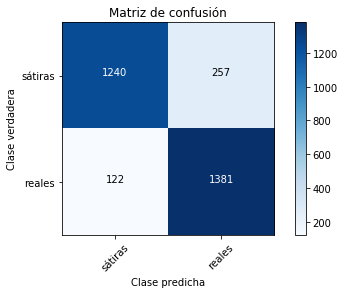

In [50]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stopwords, optimal_parameters, SVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_stopwords)

## Experimento 2: Stemming

In [51]:
#Prueba de los metodos anteriores
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [52]:
tf_idf_vect_stemming = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

Numero de caracteristicas:  (7000, 17652)

train time: 22.907s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8771428571428571
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8813333333333333
F1_score: 0.8810668702635549
Precision: 0.8845427782303057
Recall: 0.8812421916354332

             precision    recall  f1-score   support

       fake     0.9192    0.8357    0.8754      1497
       real     0.8499    0.9268    0.8867      1503

avg / total     0.8845    0.8813    0.8811      3000

[[1251  246]
 [ 110 1393]]

Confusion matrix, without normalization
[[1251  246]
 [ 110 1393]]
CPU times: user 18 s, sys: 1.36 s, total: 19.4 s
Wall time: 31 s


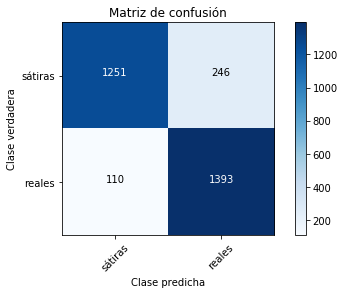

In [53]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stemming, optimal_parameters, SVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_stemming)

## Experimento 3: Lematizacion

In [54]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [55]:
tf_idf_vect_lemmatize = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

Numero de caracteristicas:  (7000, 18690)

train time: 24.922s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8762857142857143
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8763333333333333
F1_score: 0.8760970779950525
Precision: 0.8790078509466264
Recall: 0.8762495049980199

             precision    recall  f1-score   support

       fake     0.9103    0.8343    0.8707      1497
       real     0.8477    0.9182    0.8815      1503

avg / total     0.8789    0.8763    0.8761      3000

[[1249  248]
 [ 123 1380]]

Confusion matrix, without normalization
[[1249  248]
 [ 123 1380]]
CPU times: user 12.1 s, sys: 1.81 s, total: 13.9 s
Wall time: 29.1 s


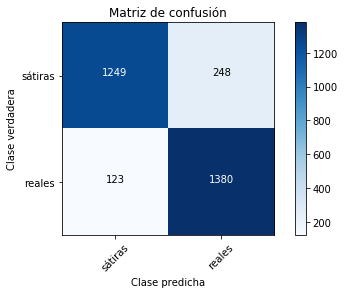

In [56]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_lemmatize, optimal_parameters, SVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [57]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [58]:
tf_idf_vect_no_urls = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

Numero de caracteristicas:  (7000, 15606)

train time: 21.976s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8472857142857143
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8506666666666667
F1_score: 0.8506642772951034
Precision: 0.8506732909051392
Recall: 0.8506620693149439

             precision    recall  f1-score   support

       fake     0.8518    0.8484    0.8501      1497
       real     0.8496    0.8530    0.8513      1503

avg / total     0.8507    0.8507    0.8507      3000

[[1270  227]
 [ 221 1282]]

Confusion matrix, without normalization
[[1270  227]
 [ 221 1282]]
CPU times: user 12.8 s, sys: 1.58 s, total: 14.4 s
Wall time: 25.9 s


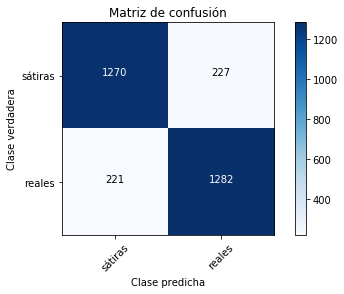

In [59]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_no_urls, optimal_parameters, SVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [60]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [61]:
tf_idf_vect_norm_letters = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

Numero de caracteristicas:  (7000, 23276)

train time: 25.495s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8877142857142857
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8803333333333333
F1_score: 0.8800758829037314
Precision: 0.883394338526841
Recall: 0.8802441876434173

             precision    recall  f1-score   support

       fake     0.9172    0.8357    0.8745      1497
       real     0.8496    0.9248    0.8856      1503

avg / total     0.8833    0.8803    0.8801      3000

[[1251  246]
 [ 113 1390]]

Confusion matrix, without normalization
[[1251  246]
 [ 113 1390]]
CPU times: user 15.3 s, sys: 1.64 s, total: 16.9 s
Wall time: 30.9 s


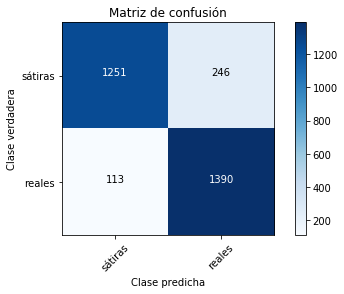

In [62]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_norm_letters, optimal_parameters, SVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [63]:
tf_idf_vect_pruning10 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

Numero de caracteristicas:  (7000, 1214)

train time: 10.702s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8481428571428572
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8293333333333334
F1_score: 0.8291726797290253
Precision: 0.8304372861081166
Recall: 0.8292753171012683

             precision    recall  f1-score   support

       fake     0.8490    0.8003    0.8239      1497
       real     0.8118    0.8583    0.8344      1503

avg / total     0.8304    0.8293    0.8292      3000

[[1198  299]
 [ 213 1290]]

Confusion matrix, without normalization
[[1198  299]
 [ 213 1290]]
CPU times: user 5.95 s, sys: 1.46 s, total: 7.41 s
Wall time: 12.9 s


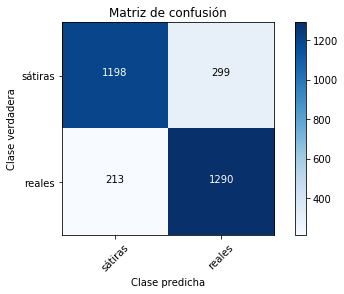

In [64]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning10, optimal_parameters, SVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [65]:
tf_idf_vect_pruning5 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

Numero de caracteristicas:  (7000, 2658)

train time: 11.584s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8627142857142858
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8493333333333334
F1_score: 0.8492845015118231
Precision: 0.8497035906841642
Recall: 0.8493007305362554

             precision    recall  f1-score   support

       fake     0.8606    0.8330    0.8466      1497
       real     0.8388    0.8656    0.8520      1503

avg / total     0.8497    0.8493    0.8493      3000

[[1247  250]
 [ 202 1301]]

Confusion matrix, without normalization
[[1247  250]
 [ 202 1301]]
CPU times: user 6.7 s, sys: 1.48 s, total: 8.18 s
Wall time: 14.2 s


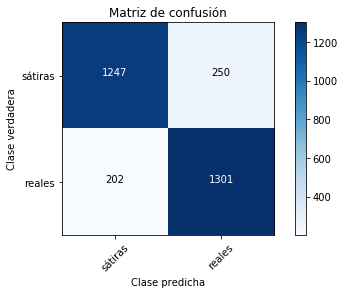

In [66]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning5, optimal_parameters, SVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_pruning5)

In [67]:
len(all_experiments_results)

8

In [68]:
import xlsxwriter

In [69]:
# Create a workbook and add a worksheet.
# workbook = xlsxwriter.Workbook('result_es_news_fakes_svm_rbf_tfidf.xlsx')
# worksheet = workbook.add_worksheet()
# row = 0
# col = 0
# for exp in all_experiments_results:
#     worksheet.write(row, col, exp[0])
#     row += 1
#     worksheet.write(row, col, exp[1])
#     row += 1
#     worksheet.write(row, col, exp[2])
#     row += 1
#     worksheet.write(row, col, exp[3])
#     row += 1
#     worksheet.write(row, col, exp[4])
#     row += 1
#     worksheet.write(row, col, exp[5])
#     row += 1
#     worksheet.write(row, col, exp[6])
#     row += 1
#     worksheet.write(row, col, exp[7])
#     row += 1
#     worksheet.write(row, col, exp[8])
#     row += 1
#     row = 0
#     col += 1
# workbook.close()